# Forecast Exchange Rates

## Importing Library

In [1]:
#VIZ AND DATA MANIPULATION LIBRARY
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#plotly
from plotly import tools
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#datetime
import datetime as dt

#warnings
import warnings 
warnings.filterwarnings('ignore')

## Loading Data

In [2]:
inrusd = pd.read_csv('Dataset.csv',parse_dates=["observation_date"])
inrusd.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


### Copy Data

In [3]:
#Copy Data
df = inrusd.copy()
df.head()

,observation_date,DEXINUS
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


#### Shape

In [4]:
df.shape

(12649, 2)

#### Renaming 

In [5]:
#renaming the date and rate
data = df[['observation_date', 'DEXINUS']]
data.columns = ['date', 'rate']

In [6]:
data.head()

,date,rate
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


#### info

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12649 non-null  datetime64[ns]
 1   rate    12155 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 197.8 KB


Converting rates to numeric

In [8]:
data['rate'] = pd.to_numeric(data.rate)

Sorting Date in Ascending order

In [9]:
data = data.sort_values('date', ascending=True)

#### Descriptive Stats

In [10]:
data.rate.describe()

count    12155.000000
mean        34.206133
std         21.089190
min          7.190000
25%         12.075000
50%         35.890000
75%         47.650000
max         76.950000
Name: rate, dtype: float64

#### Checking Null Values

In [11]:
data.isnull().sum()

date      0
rate    494
dtype: int64

Forward Filling Null Values

In [12]:
#Forward Filling
data.fillna(method='ffill', inplace=True)

In [13]:
data.isnull().sum()

date    0
rate    0
dtype: int64

Convert datatype int to float

In [14]:
#transformation of values to float
data['rate'] = pd.to_numeric(data['rate'], downcast="float")

#### info

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12649 entries, 0 to 12648
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    12649 non-null  datetime64[ns]
 1   rate    12649 non-null  float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 247.1 KB


#### Checking Duplicates

In [16]:
data.duplicated().sum()

0

No Duplicates found

### Final Data

In [17]:
final_data = data.copy()

In [18]:
final_data.head()

,date,rate
0,1973-01-02,8.02
1,1973-01-03,8.02
2,1973-01-04,8.00
3,1973-01-05,8.01
4,1973-01-08,8.00


In [19]:
data1 = data.copy()

In [20]:
data1 = data.set_index('date')

In [21]:
data1.head()

,rate
date,
1973-01-02,8.02
1973-01-03,8.02
1973-01-04,8.00
1973-01-05,8.01
1973-01-08,8.00


In [22]:
final_data1 = data1.copy()

### Segregating Years, Months, Day

In [23]:
#copy data 
df1 = final_data1.copy()

In [24]:
#if date is not set to index then use 
#Years
#df1['Year']= [i.year for i in df1['date']]
#Months
#d1['Month']= [i.month for i in df1['date']]
#Days
#df1['Day']= [i.day for i in df1['date']]

In [25]:
#Date is set to index
#Years
df1['Year']= df1.index.year
#Months
df1['Month']= df1.index.month
#Days
df1['Day']= df1.index.day

In [26]:
df1.head()

,rate,Year,Month,Day
date,,,,
1973-01-02,8.02,1973,1,2
1973-01-03,8.02,1973,1,3
1973-01-04,8.00,1973,1,4
1973-01-05,8.01,1973,1,5
1973-01-08,8.00,1973,1,8


In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12649 entries, 1973-01-02 to 2021-06-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rate    12649 non-null  float32
 1   Year    12649 non-null  int64  
 2   Month   12649 non-null  int64  
 3   Day     12649 non-null  int64  
dtypes: float32(1), int64(3)
memory usage: 444.7 KB


## Visialization

### Line Plot

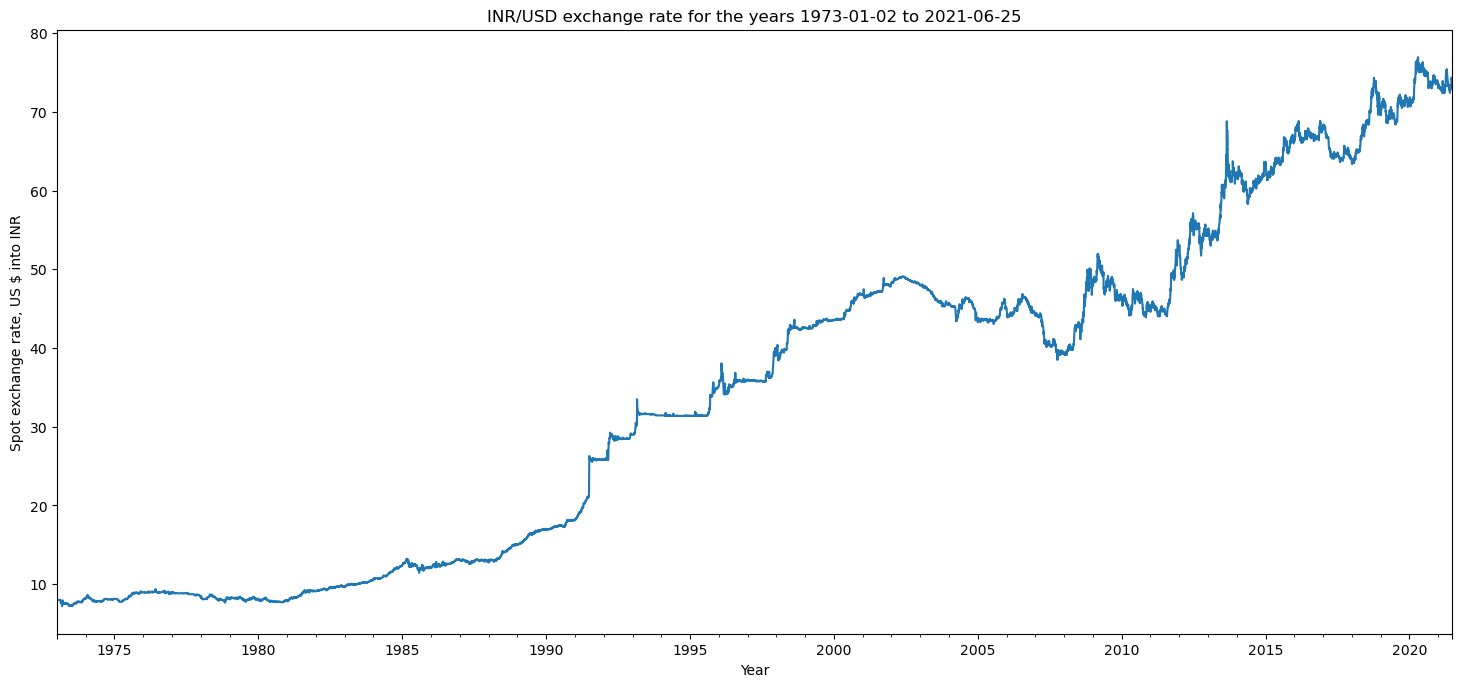

In [28]:
#Line Plot
plt.figure(figsize =(18,8),dpi=100)
df1.rate.plot()
plt.ylabel('Spot exchange rate, US \$ into INR')
plt.xlabel('Year')
plt.title('INR/USD exchange rate for the years 1973-01-02 to 2021-06-25')
plt.show()

### Line Plot on 10 years interval

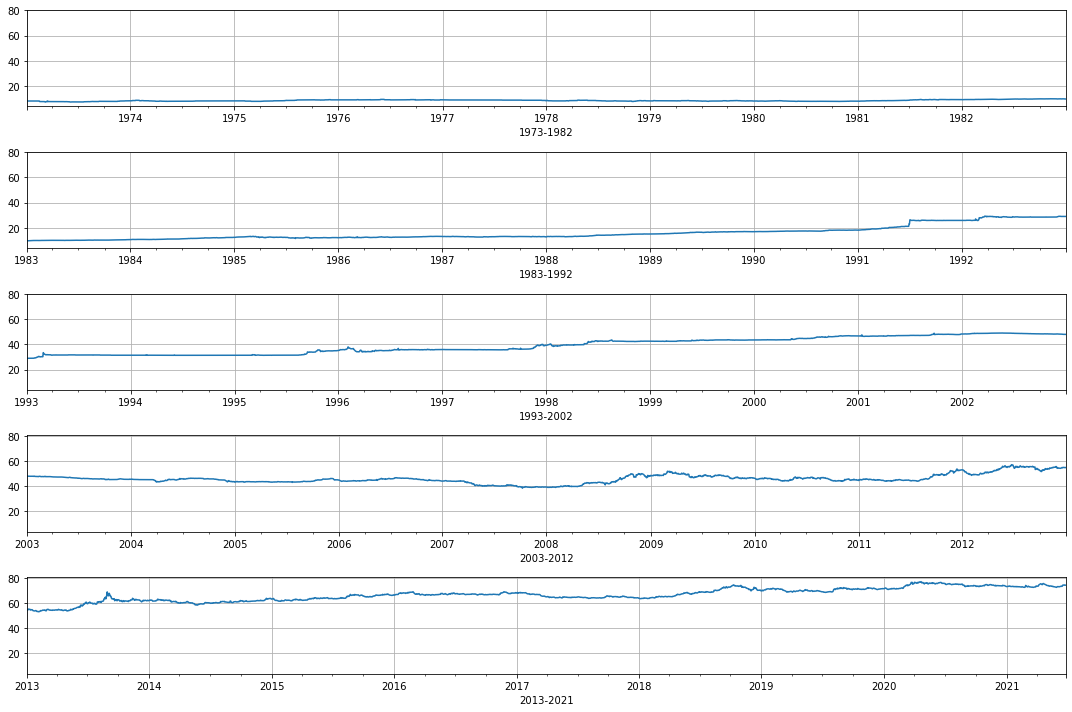

In [29]:
fig, ax = plt.subplots(5, 1, figsize=(15, 10), sharey=True)
df1.loc['1973':'1982']['rate'].plot(xlabel="1973-1982",
                                                stacked=True,
                                                ax=ax[0],
                                                grid=True)
df1.loc['1983':'1992']['rate'].plot(xlabel="1983-1992",
                                                stacked=True,
                                                ax=ax[1],
                                                grid=True)
df1.loc['1993':'2002']['rate'].plot(xlabel="1993-2002",
                                                ax=ax[2],
                                                grid=True)
df1.loc['2003':'2012']['rate'].plot(xlabel="2003-2012",
                                                ax=ax[3],
                                                grid=True)
df1.loc['2013':'2022']['rate'].plot(xlabel="2013-2021",
                                                ax=ax[4],
                                                grid=True)
plt.tight_layout()
plt.show()

### Box Plot

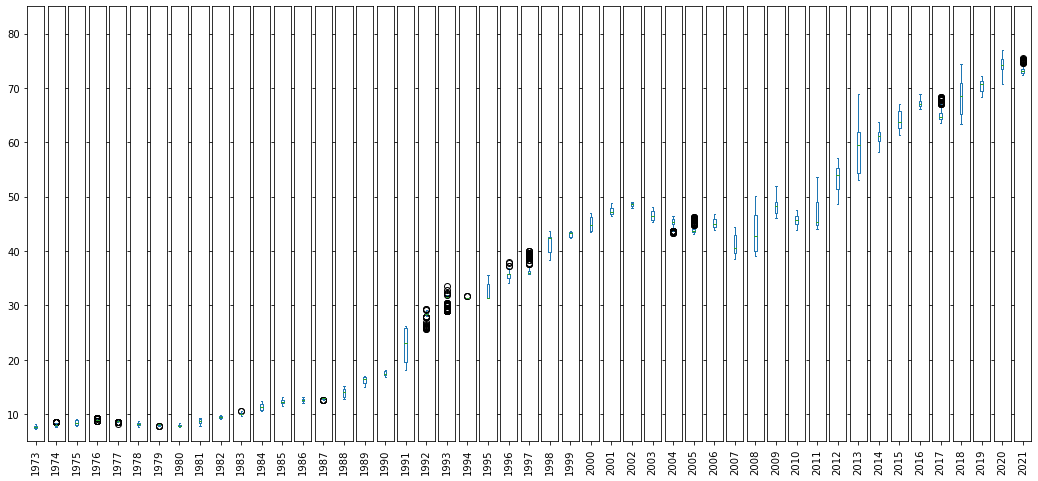

In [30]:
box1 = df1.groupby('Year')

years = list(np.unique(df1.Year))

fig, ax = plt.subplots(1, len(years), figsize=(18, 8), sharey=True)
for i, year in enumerate(years):
    X = box1.get_group(year)
    # subplots=True,layout=(1,len(A)),figsize=(18,8),use_index = True,
    X.plot(y='rate',
           kind='box',
           ax=ax[i],
           label=year,
           rot=90,
           ylim=(5, 85),
           sharey=True)
    plt.tight_layout
#plt.title('box plot');
plt.show()

### Box Plot with 5 years interval

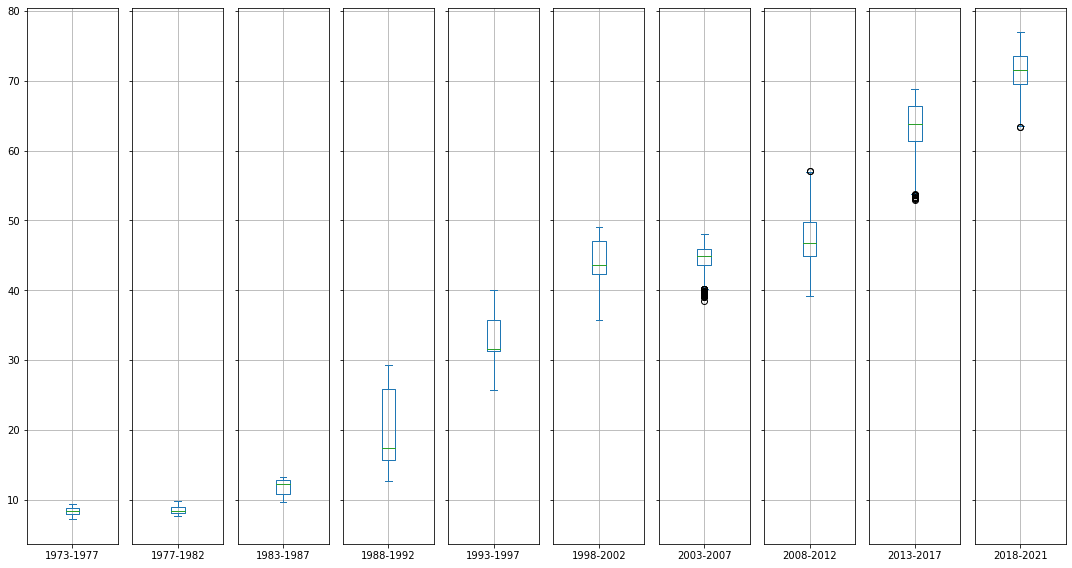

In [31]:
fig, ax = plt.subplots(1, 10, figsize=(15, 8), sharey=True)
df1.loc['1973':'1977']['rate'].plot(kind='box',
                                                label="1973-1977",
                                                stacked=True,
                                                ax=ax[0],
                                                grid=True)
df1.loc['1977':'1982']['rate'].plot(kind='box',
                                                label="1977-1982",
                                                stacked=True,
                                                ax=ax[1],
                                                grid=True)
df1.loc['1983':'1987']['rate'].plot(kind='box',
                                                label="1983-1987",
                                                stacked=True,
                                                ax=ax[2],
                                                grid=True)
df1.loc['1988':'1992']['rate'].plot(kind='box',
                                                label="1988-1992",
                                                stacked=True,
                                                ax=ax[3],
                                                grid=True)
df1.loc['1992':'1997']['rate'].plot(kind='box',
                                                label="1993-1997",
                                                ax=ax[4],
                                                grid=True)
df1.loc['1997':'2002']['rate'].plot(kind='box',
                                                label="1998-2002",
                                                ax=ax[5],
                                                grid=True)
df1.loc['2003':'2007']['rate'].plot(kind='box',
                                                label="2003-2007",
                                                ax=ax[6],
                                                grid=True)
df1.loc['2008':'2012']['rate'].plot(kind='box',
                                                label="2008-2012",
                                                ax=ax[7],
                                                grid=True)
df1.loc['2013':'2017']['rate'].plot(kind='box',
                                                label="2013-2017",
                                                ax=ax[8],
                                                grid=True)
df1.loc['2018':'2021']['rate'].plot(kind='box',
                                                label="2018-2021",
                                                ax=ax[9],
                                                grid=True)
plt.tight_layout()
plt.show()

## Stationarity

To ensure the data is staionary the ADF test is used below.

In [32]:
#ADF Test Library
from statsmodels.tsa.stattools import adfuller

### Drop Years, Month, Day

In [33]:
#Droping date
df1.drop(['Year','Month','Day'], axis=1, inplace=True)

In [34]:
df1.head(1)

,rate
date,
1973-01-02,8.02


### Normal ADF Test

#### 30 days

In [35]:
#last 30 days data
days_30 = df1.loc[df1.index >= '2021-05-25']

result_one = adfuller((days_30.rate.values), autolag='AIC')
print(f'ADF Statistic: {result_one[0]}')
print(f'n_lags: {result_one[1]}')
print(f'p-value: {result_one[1]}')
for key, value in result_one[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.442699509997094
n_lags: 0.9027216872211841
p-value: 0.9027216872211841
Critial Values:
   1%, -3.7529275211638033
Critial Values:
   5%, -2.998499866852963
Critial Values:
   10%, -2.6389669754253307


#### 6 month

In [36]:
#last 30 days data
month_six = df1.loc[df1.index >= '2020-11-25']

result_six = adfuller((month_six.rate.values), autolag='AIC')
print(f'ADF Statistic: {result_six[0]}')
print(f'n_lags: {result_six[1]}')
print(f'p-value: {result_six[1]}')
for key, value in result_six[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.0043024261782403
n_lags: 0.2846898274302509
p-value: 0.2846898274302509
Critial Values:
   1%, -3.474120870218417
Critial Values:
   5%, -2.880749791423677
Critial Values:
   10%, -2.5770126333102494


#### 1 year

In [37]:
#last 1 year data
one_year = df1.loc[df1.index >= '2020-05-25']

result_one_year = adfuller((one_year.rate.values), autolag='AIC')
print(f'ADF Statistic: {result_one_year[0]}')
print(f'n_lags: {result_one_year[1]}')
print(f'p-value: {result_one_year[1]}')
for key, value in result_one_year[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.663458928690255
n_lags: 0.08057770416134008
p-value: 0.08057770416134008
Critial Values:
   1%, -3.4535872903895797
Critial Values:
   5%, -2.871771355211212
Critial Values:
   10%, -2.5722217283277127


#### 5 years

In [38]:
five_year = df1.loc[df1.index >= '2016-05-25']

result_five = adfuller((five_year.rate.values), autolag='AIC')
print(f'ADF Statistic: {result_five[0]}')
print(f'n_lags: {result_five[1]}')
print(f'p-value: {result_five[1]}')
for key, value in result_five[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.9808751265280152
n_lags: 0.7601755958120879
p-value: 0.7601755958120879
Critial Values:
   1%, -3.435287448902869
Critial Values:
   5%, -2.8637204923840334
Critial Values:
   10%, -2.5679309018875833


#### 10 years

In [39]:
#last 10 year data
ten_year = df1.loc[df1.index >= '2011-05-25']

result_ten = adfuller((ten_year.rate.values), autolag='AIC')
print(f'ADF Statistic: {result_ten[0]}')
print(f'n_lags: {result_ten[1]}')
print(f'p-value: {result_ten[1]}')
for key, value in result_ten[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.2167864296687414
n_lags: 0.20020945899153436
p-value: 0.20020945899153436
Critial Values:
   1%, -3.432841702058772
Critial Values:
   5%, -2.8626408441287974
Critial Values:
   10%, -2.5673560179979247


#### P-value of ADF test

In [40]:
pval = [('30 days',result_one[0], result_one[1]),
          ('6 Months',result_six[0], result_six[1]),
          ('1 year',result_one_year[0], result_one_year[1]),
          ('5 years',result_five[0], result_five[1]),
          ('10 years',result_ten[0], result_ten[1])]

In [41]:
pval_df1 = pd.DataFrame(data = pval, columns = ['Time Series', 'ADF Stats', 'P Value'])
pval_df1

,Time Series,ADF Stats,P Value
0,30 days,-0.442700,0.902722
1,6 Months,-2.004302,0.284690
2,1 year,-2.663459,0.080578
3,5 years,-0.980875,0.760176
4,10 years,-2.216786,0.200209


### Differentation of time series using ADF Test

In [42]:
#30 days
days_30_diff = days_30.diff().dropna()

#six month
month_six_diff = month_six.diff().dropna()

#1 year
one_year_diff = one_year.diff().dropna()

#5 years
five_year_diff = five_year.diff().dropna()

#10 years
ten_year_diff = ten_year.diff().dropna()

#### 30 days

In [43]:
#30 days data
result_one_diff = adfuller((days_30_diff.rate.values), autolag='AIC')
print(f'ADF Statistic: {result_one_diff[0]}')
print(f'n_lags: {result_one_diff[1]}')
print(f'p-value: {result_one_diff[1]}')
for key, value in result_one_diff[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -4.925721072120063
n_lags: 3.1069287070298336e-05
p-value: 3.1069287070298336e-05
Critial Values:
   1%, -3.769732625845229
Critial Values:
   5%, -3.005425537190083
Critial Values:
   10%, -2.6425009917355373


#### 6 months

In [44]:
#Six Months
result_six_diff = adfuller((month_six_diff.rate.values), autolag='AIC')
print(f'ADF Statistic: {result_six_diff[0]}')
print(f'n_lags: {result_six_diff[1]}')
print(f'p-value: {result_six_diff[1]}')
for key, value in result_six_diff[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -11.952722731855145
n_lags: 4.279486176399479e-22
p-value: 4.279486176399479e-22
Critial Values:
   1%, -3.4744158894942156
Critial Values:
   5%, -2.880878382771059
Critial Values:
   10%, -2.577081275821236


#### 1 year

In [45]:
# last 1 year data
result_one_year_diff = adfuller((one_year_diff.rate.values), autolag='AIC')
print(f'ADF Statistic: {result_one_year_diff[0]}')
print(f'n_lags: {result_one_year_diff[1]}')
print(f'p-value: {result_one_year_diff[1]}')
for key, value in result_one_year_diff[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -17.49596970930224
n_lags: 4.411272936454735e-30
p-value: 4.411272936454735e-30
Critial Values:
   1%, -3.453670163592738
Critial Values:
   5%, -2.8718077069772248
Critial Values:
   10%, -2.5722411158835796


#### 5 years

In [46]:
#last 5 year data
result_five_diff = adfuller((five_year_diff.rate.values), autolag='AIC')
print(f'ADF Statistic: {result_five_diff[0]}')
print(f'n_lags: {result_five_diff[1]}')
print(f'p-value: {result_five_diff[1]}')
for key, value in result_five_diff[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -27.30479189978881
n_lags: 0.0
p-value: 0.0
Critial Values:
   1%, -3.435294916169133
Critial Values:
   5%, -2.863723787379918
Critial Values:
   10%, -2.5679326566037735


#### 10 years

In [47]:
#last 10 years data
result_ten_diff = adfuller((ten_year_diff.rate.values), autolag='AIC')
print(f'ADF Statistic: {result_ten_diff[0]}')
print(f'n_lags: {result_ten_diff[1]}')
print(f'p-value: {result_ten_diff[1]}')
for key, value in result_ten_diff[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -21.900815662366945
n_lags: 0.0
p-value: 0.0
Critial Values:
   1%, -3.432841702058772
Critial Values:
   5%, -2.8626408441287974
Critial Values:
   10%, -2.5673560179979247


In [48]:
pval_diff = [('30 days',result_one_diff[0], result_one_diff[1]),
              ('6 Months',result_six_diff[0], result_six_diff[1]),
              ('1 year',result_one_year_diff[0], result_one_year_diff[1]),
              ('5 years',result_five_diff[0], result_five_diff[1]),
              ('10 years',result_ten_diff[0], result_ten_diff[1])]

#### P-values on ADF tests on Differentation

In [49]:
pval_df_diff = pd.DataFrame(data = pval_diff, columns = ['Time Series on Differeation', 'ADF Stats', 'P Value'])
pval_df_diff

,Time Series on Differeation,ADF Stats,P Value
0,30 days,-4.925721,3.106929e-05
1,6 Months,-11.952723,4.279486e-22
2,1 year,-17.495970,4.411273e-30
3,5 years,-27.304792,0.000000e+00
4,10 years,-21.900816,0.000000e+00


### ADF test on Log function

Log Transformations

In [50]:
#30 days

days_30_log = np.log(days_30)

#six month

month_six_log = np.log(month_six)

#1 year

one_year_log = np.log(one_year)

#5 years

five_year_log = np.log(five_year)

#10 years

ten_year_log = np.log(ten_year)

#Entire Data
data_log = np.log(df1)

In [51]:
days_30_log.head()

,rate
date,
2021-05-25,4.287441
2021-05-26,4.286479
2021-05-27,4.284827
2021-05-28,4.282483
2021-05-31,4.282483


#### 30 days

In [52]:
#30 days
result_days_30_log = adfuller((days_30_log.rate.values), autolag='AIC')
print(f'ADF Statistic: {result_days_30_log[0]}')
print(f'n_lags: {result_days_30_log[1]}')
print(f'p-value: {result_days_30_log[1]}')
for key, value in result_days_30_log[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.442666595519638
n_lags: 0.9027275674654942
p-value: 0.9027275674654942
Critial Values:
   1%, -3.7529275211638033
Critial Values:
   5%, -2.998499866852963
Critial Values:
   10%, -2.6389669754253307


#### 6 months

In [53]:
#Six month
result_month_six_log = adfuller((month_six_log.rate.values), autolag='AIC')
print(f'ADF Statistic: {result_month_six_log[0]}')
print(f'n_lags: {result_month_six_log[1]}')
print(f'p-value: {result_month_six_log[1]}')
for key, value in result_month_six_log[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.0076417869540184
n_lags: 0.2832325266173346
p-value: 0.2832325266173346
Critial Values:
   1%, -3.474120870218417
Critial Values:
   5%, -2.880749791423677
Critial Values:
   10%, -2.5770126333102494


#### 1 year

In [54]:
#1 year
result_one_year_log = adfuller((one_year_log.rate.values), autolag='AIC')
print(f'ADF Statistic: {result_one_year_log[0]}')
print(f'n_lags: {result_one_year_log[1]}')
print(f'p-value: {result_one_year_log[1]}')
for key, value in result_one_year_log[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.6573488829918803
n_lags: 0.08171399506966559
p-value: 0.08171399506966559
Critial Values:
   1%, -3.4535872903895797
Critial Values:
   5%, -2.871771355211212
Critial Values:
   10%, -2.5722217283277127


#### 5 years

In [55]:
#5 years
result_five_year_log = adfuller((five_year_log.rate.values), autolag='AIC')
print(f'ADF Statistic: {result_five_year_log[0]}')
print(f'n_lags: {result_five_year_log[1]}')
print(f'p-value: {result_five_year_log[1]}')
for key, value in result_five_year_log[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.9551895471909227
n_lags: 0.7692552053844144
p-value: 0.7692552053844144
Critial Values:
   1%, -3.435287448902869
Critial Values:
   5%, -2.8637204923840334
Critial Values:
   10%, -2.5679309018875833


#### 10 years

In [56]:
#10 years
result_ten_year_log = adfuller((ten_year_log.rate.values), autolag='AIC')
print(f'ADF Statistic: {result_ten_year_log[0]}')
print(f'n_lags: {result_ten_year_log[1]}')
print(f'p-value: {result_ten_year_log[1]}')
for key, value in result_ten_year_log[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -2.670302260134
n_lags: 0.0793197594584556
p-value: 0.0793197594584556
Critial Values:
   1%, -3.432841702058772
Critial Values:
   5%, -2.8626408441287974
Critial Values:
   10%, -2.5673560179979247


#### Entire Data

In [57]:
#Entire Data
result_data_log = adfuller((data_log.rate.values), autolag='AIC')
print(f'ADF Statistic: {result_data_log[0]}')
print(f'n_lags: {result_data_log[1]}')
print(f'p-value: {result_data_log[1]}')
for key, value in result_data_log[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: -0.7958768729246304
n_lags: 0.8203302057042136
p-value: 0.8203302057042136
Critial Values:
   1%, -3.4308674957361065
Critial Values:
   5%, -2.8617687075912266
Critial Values:
   10%, -2.5668917360747368


##### P values of Log function

In [58]:
pval_log = [('30 days',result_days_30_log[0], result_days_30_log[1]),
          ('6 Months',result_month_six_log[0], result_month_six_log[1]),
          ('1 year',result_one_year_log[0], result_one_year_log[1]),
          ('5 years',result_five_diff[0], result_five_diff[1]),
          ('10 years',result_ten_year_log[0], result_ten_year_log[1]),
            ('Entire Data',result_data_log[0], result_data_log[1])]

In [59]:
pval_df_log = pd.DataFrame(data = pval_log, columns = ['Time Series on Log Function', 'ADF Stats', 'P Value'])
pval_df_log

,Time Series on Log Function,ADF Stats,P Value
0,30 days,-0.442667,0.902728
1,6 Months,-2.007642,0.283233
2,1 year,-2.657349,0.081714
3,5 years,-27.304792,0.000000
4,10 years,-2.670302,0.079320
5,Entire Data,-0.795877,0.820330


### Spliting Data

In [60]:
df_oneyear = one_year.copy()

In [61]:
df_oneyear.head()

,rate
date,
2020-05-25,75.989998
2020-05-26,75.430000
2020-05-27,75.879997
2020-05-28,75.669998
2020-05-29,75.589996


In [62]:
df_oneyear.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 285 entries, 2020-05-25 to 2021-06-25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rate    285 non-null    float32
dtypes: float32(1)
memory usage: 3.3 KB


In [63]:
split_point = round(len(df_oneyear)*(3/4))
df1_train = df_oneyear[:split_point]
len_train = len(df1_train)
df1_test = df_oneyear[split_point:]
len_test = len(df1_test)
print('The first day of the Training dataset is '+str(df1_train.index[0].date()))
print('The last day of the Training dataset is '+str(df1_train.index[-1].date()))
print('The first day of the Testing dataset is '+str(df1_test.index[0].date()))
print('The last day of the Testing dataset is '+str(df1_test.index[-1].date()))

The first day of the Training dataset is 2020-05-25
The last day of the Training dataset is 2021-03-18
The first day of the Testing dataset is 2021-03-19
The last day of the Testing dataset is 2021-06-25


#### Visualization onf Train and Test

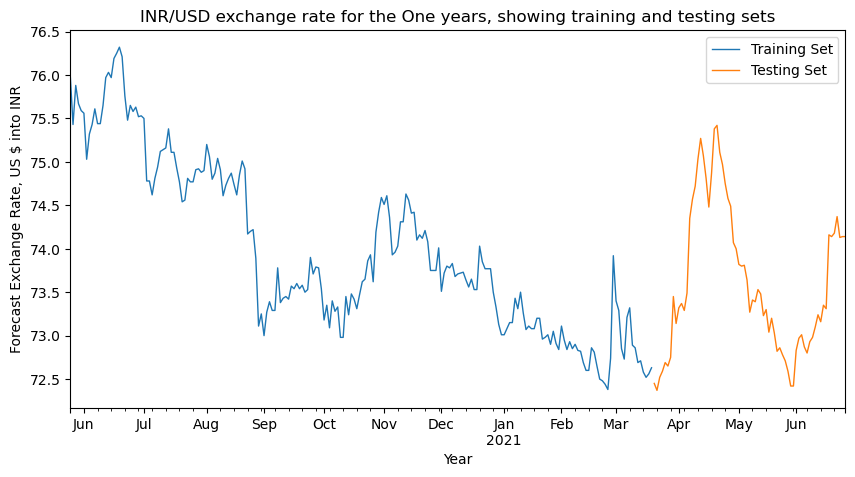

In [64]:
fig, ax = plt.subplots(figsize =(10,5), dpi=100)
df1_train.plot(ax=ax, linewidth= 1)
df1_test.plot(ax=ax, linewidth =1)
plt.ylabel('Forecast Exchange Rate, US \$ into INR')
plt.xlabel('Year')
plt.title('INR/USD exchange rate for the One years, showing training and testing sets')
ax.legend(["Training Set", "Testing Set"])
plt.show()

### Autocorrelation Function and Partial Autocorrelation Function

In [65]:
#library
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

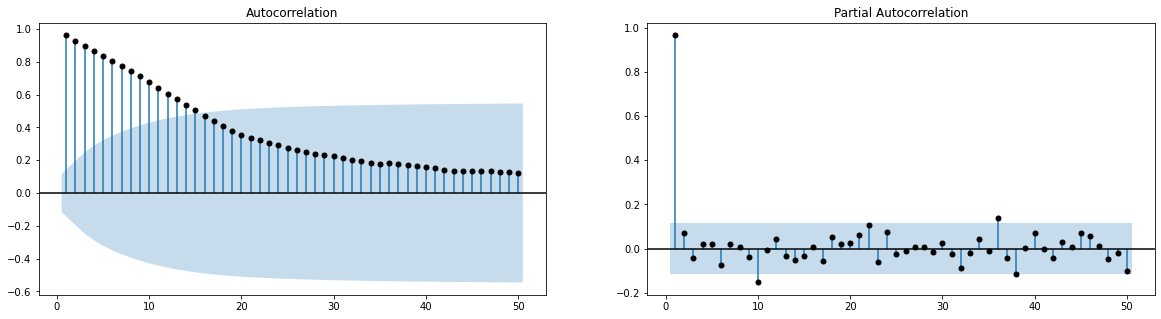

In [66]:
# make figure
fig, ax = plt.subplots(1,2,figsize=(20,5))

# make ACF plot
plot_acf(df_oneyear, lags=50, zero=False, ax=ax[0],color="black");

#make PACF plot
plot_pacf(df_oneyear, lags=50, zero=False, ax=ax[1],color="black");

## Arima Model for 1 year

In [67]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, r2_score,mean_absolute_error

In [68]:
arima1 = pm.auto_arima(df1_train.rate, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=10,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True, 
                      maxiter = 100, )
print(arima1.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-18.933, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-19.258, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-19.667, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-19.927, Time=0.15 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.544 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  10.963
Date:                Fri, 13 Aug 2021   AIC                            -19.927
Time:                        18:59:36   BIC                            -16.565
Sample:                             0   HQIC                           -18.568
                                - 214                                         
Covari

In [69]:
training_data = df1_train['rate'].values
testing_data =  df1_test['rate'].values

hist = [x for x in training_data]
model_predictions = []
for t in range(len(testing_data)):
    model = ARIMA(hist, order = (0,1,0))
    model_fit = model.fit(disp = 0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    test_value = testing_data[t]
    hist.append(test_value)
rmse = sqrt(mean_squared_error(testing_data, model_predictions))
print("ROOT MEAN SQUARED ERROR is {}".format(rmse))

C:\Users\Punith Gowda\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

C:\Users\Punith Gowda\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



ROOT MEAN SQUARED ERROR is 0.25039720184129866


### Visualization

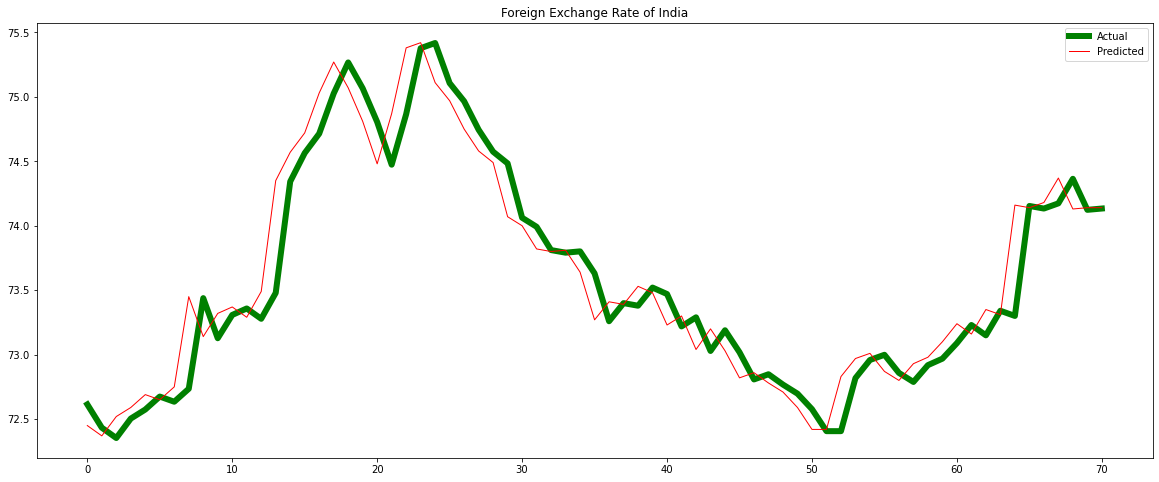

In [70]:
plt.figure(figsize=(20,8))
plt.title('Foreign Exchange Rate of India')
plt.plot(model_predictions , label = 'Actual', color = 'g', linewidth=6)
plt.plot(testing_data , label = 'Predicted', color = 'r', linewidth=1)
plt.legend()

In [71]:
mape = mean_absolute_error(model_predictions,testing_data)*100
print('MAPE:',mape)

MAPE: 18.054091948131397


### Prediction

In [72]:
#Arima Model
model_arm = ARIMA(df_oneyear, order=(0,1,0))
model_fit_arm = model_arm.fit()

C:\Users\Punith Gowda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Punith Gowda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



In [73]:
arima_pred = model_fit_arm.forecast(steps = 30)[0]
arima_pred

array([74.13348531, 74.12697123, 74.12045715, 74.11394307, 74.10742899,
       74.10091491, 74.09440082, 74.08788674, 74.08137266, 74.07485858,
       74.0683445 , 74.06183042, 74.05531634, 74.04880226, 74.04228818,
       74.0357741 , 74.02926002, 74.02274594, 74.01623186, 74.00971777,
       74.00320369, 73.99668961, 73.99017553, 73.98366145, 73.97714737,
       73.97063329, 73.96411921, 73.95760513, 73.95109105, 73.94457697])

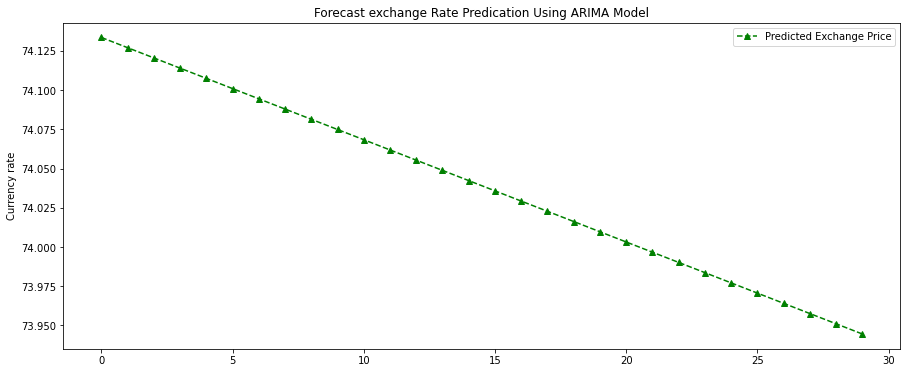

In [74]:
#plot
plt.figure(figsize=(15,6))
plt.plot(arima_pred, color='green', linestyle="dashed", marker='^', label = "Predicted Exchange Price")
plt.title('Forecast exchange Rate Predication Using ARIMA Model')
plt.ylabel('Currency rate')
plt.legend()
plt.show()

### One Step Forecasting

In [75]:
#Library
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [76]:

#fit the model
model_osa=SARIMAX(df1, order=(0,1,0), trend="c")
results_osa = model_osa.fit()
#assign residuals to variable
resid_osa = results_osa.resid

C:\Users\Punith Gowda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Punith Gowda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



In [77]:
print(results_osa.summary())

                               SARIMAX Results                                
Dep. Variable:                   rate   No. Observations:                12649
Model:               SARIMAX(0, 1, 0)   Log Likelihood                4013.684
Date:                Fri, 13 Aug 2021   AIC                          -8023.368
Time:                        18:59:39   BIC                          -8008.477
Sample:                    01-02-1973   HQIC                         -8018.386
                         - 06-25-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0052      0.002      3.241      0.001       0.002       0.008
sigma2         0.0310   8.76e-05    354.495      0.000       0.031       0.031
Ljung-Box (L1) (Q):                  14.04   Jarque-

In [78]:
forecast_osa = results_osa.get_prediction(start=-len_test, end=df1.index[-1])
#forecast mean
mean_forecast_osa = forecast_osa.predicted_mean
#get a confidence interval of forecasts
confidence_intervals_osa = forecast_osa.conf_int()

#### Visualization

In [79]:
#library
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

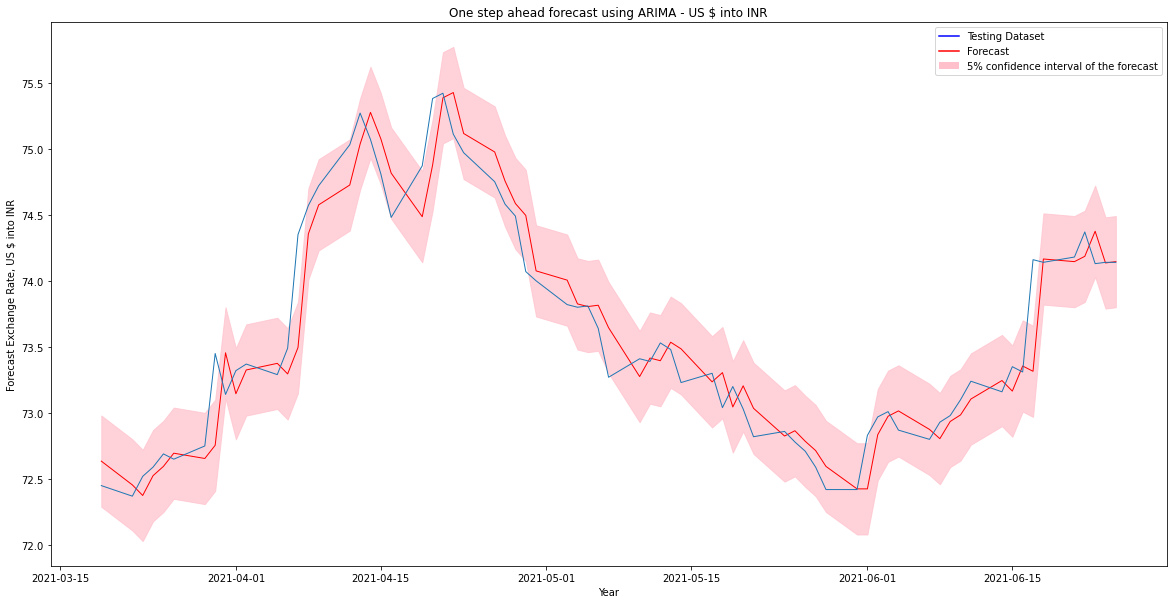

In [80]:
plt.figure(figsize=(20,10))
plt.plot(mean_forecast_osa.index, mean_forecast_osa, color='r', label='Forecast', linewidth=1)
plt.plot(df1_test, label='Testing dataset', linewidth=1)
plt.xlabel('Year')
plt.ylabel('Forecast Exchange Rate, US \$ into INR')
plt.title('One step ahead forecast using ARIMA - US \$ into INR')
plt.fill_between(mean_forecast_osa.index, confidence_intervals_osa['lower rate'], confidence_intervals_osa['upper rate'], color='pink', alpha=0.7)

legend_elements = [Line2D(df1_test.index, df1_test.values, color='b', label='Testing Dataset'),
                   Line2D(mean_forecast_osa.index, mean_forecast_osa, color='r', label='Forecast'),
                   Patch(facecolor='pink', label='5% confidence interval of the forecast')]
plt.legend(handles=legend_elements)

plt.show()

### Dynamic Forecast

In [81]:
#fit the model
training_model=SARIMAX(df1_train, order=(0,1,0), trend='c', dynamic=True)
training_results = training_model.fit()
#assign residuals to variable
training_resid = training_results.resid

C:\Users\Punith Gowda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Punith Gowda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



In [82]:
print(training_results.summary())

                               SARIMAX Results                                
Dep. Variable:                   rate   No. Observations:                  214
Model:               SARIMAX(0, 1, 0)   Log Likelihood                  11.466
Date:                Fri, 13 Aug 2021   AIC                            -18.933
Time:                        18:59:39   BIC                            -12.210
Sample:                    05-25-2020   HQIC                           -16.216
                         - 03-18-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0158      0.016     -0.999      0.318      -0.047       0.015
sigma2         0.0526      0.003     17.661      0.000       0.047       0.058
Ljung-Box (L1) (Q):                   2.29   Jarque-

In [83]:
insample_forecast = training_results.get_prediction(start = df1_train.index[-1], end=df1_test.index[-1])
mean_insample_forecast = insample_forecast.predicted_mean
insample_confidence_intervals = insample_forecast.conf_int()

#### Visualization

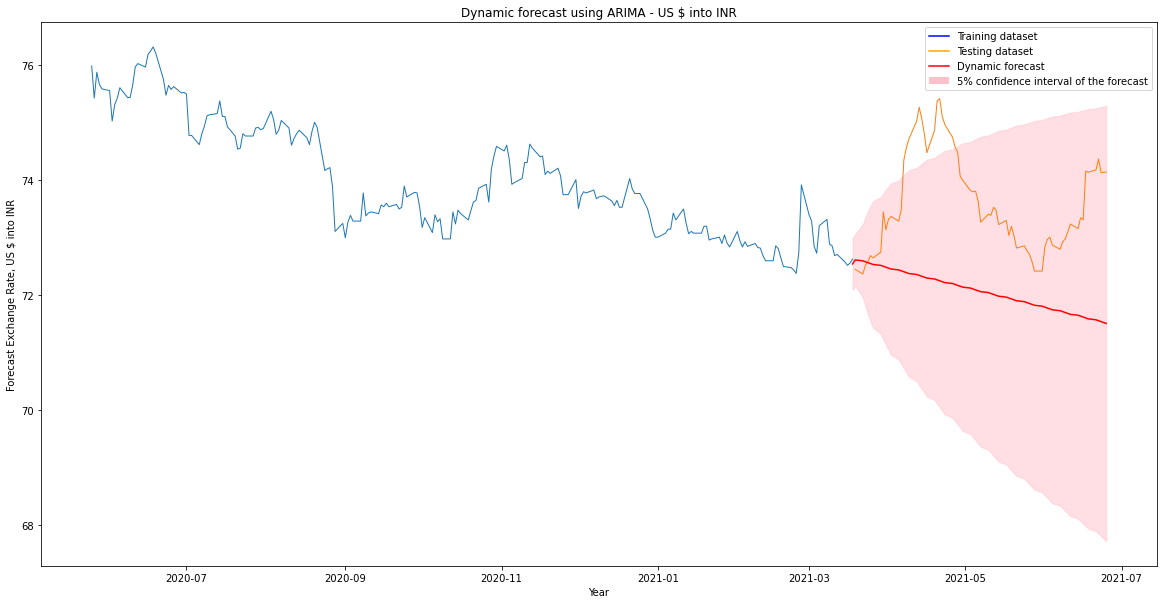

In [84]:
plt.figure(figsize=(20,10))
plt.plot(df1_train, linewidth=1)
plt.plot(df1_test, linewidth=1)
plt.plot(mean_insample_forecast.index, mean_insample_forecast, color='r', label='forecast')
plt.xlabel('Year')
plt.ylabel('Forecast Exchange Rate, US \$ into INR')
plt.title('Dynamic forecast using ARIMA - US \$ into INR')
plt.fill_between(mean_insample_forecast.index, insample_confidence_intervals['lower rate'], insample_confidence_intervals['upper rate'], color='pink', alpha=0.5)

legend_elements_2 = [Line2D(df1_train.index, df1_train, color='blue', label='Training dataset'),
                   Line2D(df1_test.index, df1_test, color='orange', label='Testing dataset'),
                   Line2D(mean_insample_forecast.index, mean_insample_forecast, color='r', label='Dynamic forecast'),
                   Patch(facecolor='pink', label='5% confidence interval of the forecast')]
plt.legend(handles=legend_elements_2)

plt.show()

### Out of Sample Forecast

In [85]:
model_oos = SARIMAX(df1, order=(0,1,0))
result_oos = model_oos.fit()

C:\Users\Punith Gowda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.

C:\Users\Punith Gowda\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning:

No frequency information was provided, so inferred frequency B will be used.



In [86]:
oos_forecast = result_oos.get_forecast(steps=30)
oos_mean_forecast = oos_forecast.predicted_mean
oos_confidence_intervals=oos_forecast.conf_int()

#### Visualization

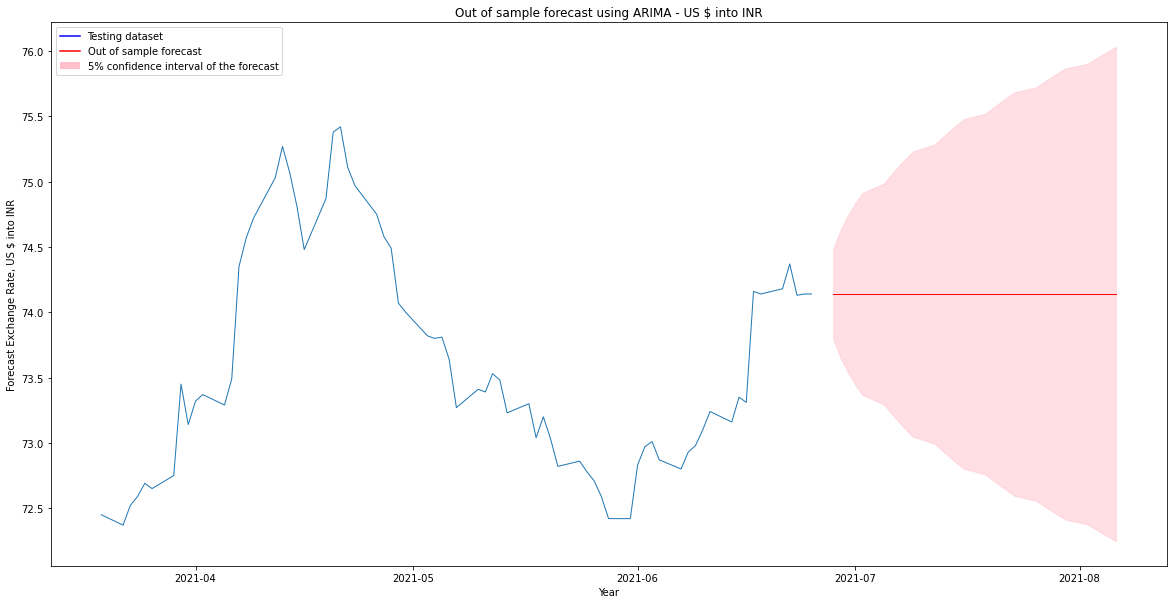

In [87]:
plt.figure(figsize=(20,10))
plt.plot(oos_mean_forecast.index, oos_mean_forecast, color='r', label='forecast', linewidth=1)
plt.plot(df1_test, linewidth=1)
plt.xlabel('Year')
plt.ylabel('Forecast Exchange Rate, US \$ into INR')
plt.title('Out of sample forecast using ARIMA - US \$ into INR')
plt.fill_between(oos_mean_forecast.index,
                 oos_confidence_intervals['lower rate'],
                 oos_confidence_intervals['upper rate'],
                 color='pink', alpha=0.5)

legend_elements_3 = [Line2D(df1_test.index, df1_test, color='blue', label='Testing dataset'),
                   Line2D(mean_insample_forecast.index, mean_insample_forecast, color='r', label='Out of sample forecast'),
                   Patch(facecolor='pink', label='5% confidence interval of the forecast')]
plt.legend(handles=legend_elements_3, loc='upper left')
plt.show()